In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Загрузка второго CSV файла
df = pd.read_csv('merged_file.csv')  # замените 'second_file.csv' на имя вашего второго файла

In [3]:
# преобразуем в датувремя
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

# выделяем час посещения
df['event_hour'] = df['event_timestamp'].dt.hour
df = df.drop('event_timestamp', axis=1)


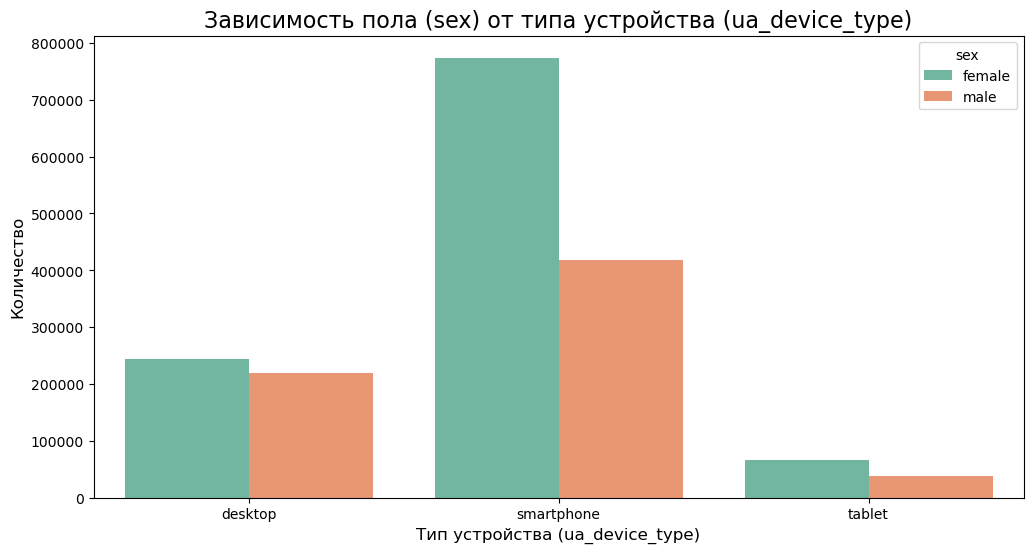

In [4]:
# Создаем график зависимости поля sex от ua_device_type и ua_os
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ua_device_type', hue='sex', palette='Set2')

# Добавляем заголовок и метки
plt.title('Зависимость пола (sex) от типа устройства (ua_device_type)', fontsize=16)
plt.xlabel('Тип устройства (ua_device_type)', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Показываем график
plt.show()

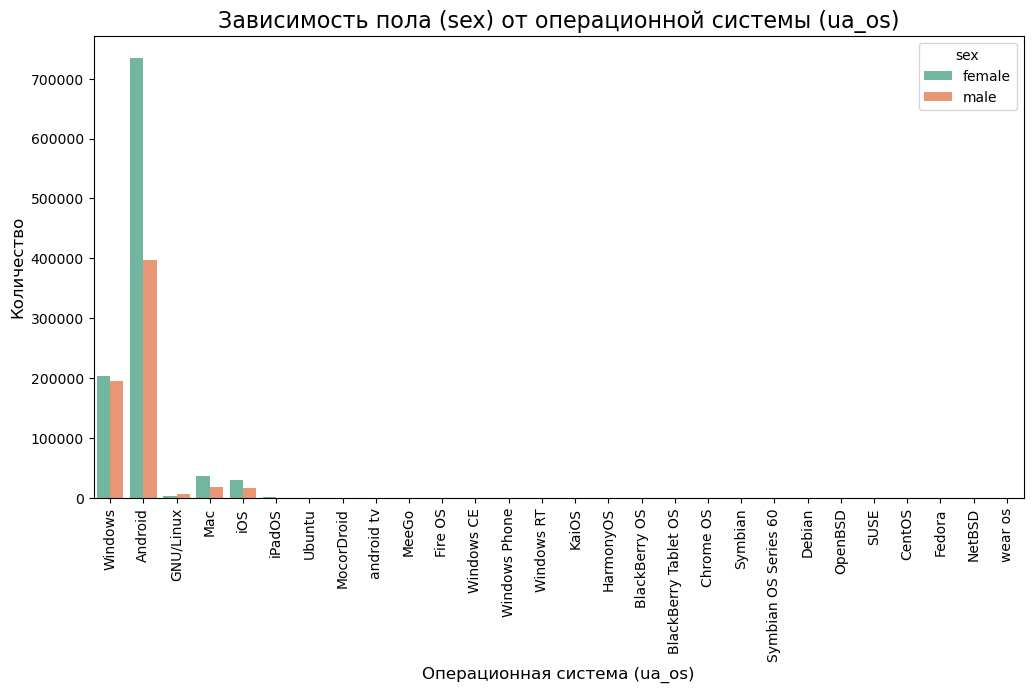

In [5]:
# Дополнительно можно построить аналогичный график по ua_os
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ua_os', hue='sex', palette='Set2')

# Добавляем заголовок и метки
plt.title('Зависимость пола (sex) от операционной системы (ua_os)', fontsize=16)
plt.xlabel('Операционная система (ua_os)', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Поворачиваем подписи на оси X вертикально
plt.xticks(rotation=90)

# Показываем график
plt.show()

In [6]:
df['region'] = df['region'].astype('category')
df['ua_device_type'] = df['ua_device_type'].astype('category')
df['ua_client_type'] = df['ua_client_type'].astype('category')
df['ua_os'] = df['ua_os'].astype('category')
df['ua_client_name'] = df['ua_client_name'].astype('category')
df['sex'] = df['sex'].astype('category')

df = df.drop('rutube_video_id', axis=1)
df = df.drop('viewer_uid', axis=1)

label_encoder = LabelEncoder()

df['region'] = label_encoder.fit_transform(df['region'])
df['ua_device_type'] = label_encoder.fit_transform(df['ua_device_type'])
df['ua_client_type'] = label_encoder.fit_transform(df['ua_client_type'])
df['ua_os'] = label_encoder.fit_transform(df['ua_os'])
df['ua_client_name'] = label_encoder.fit_transform(df['ua_client_name'])
df['sex'] = label_encoder.fit_transform(df['sex'])

print(df.dtypes)

region             int64
ua_device_type     int64
ua_client_type     int64
ua_os              int64
ua_client_name     int64
total_watchtime    int64
age                int64
sex                int64
age_class          int64
event_hour         int32
dtype: object


             region  ua_device_type  ua_client_type         ua_os  \
count  1.759616e+06    1.759616e+06    1.759616e+06  1.759616e+06   
mean   6.009857e+01    7.957310e-01    1.648005e+00  7.469594e+00   
std    2.715682e+01    5.295697e-01    4.776152e-01  1.040888e+01   
min    0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
25%    4.900000e+01    0.000000e+00    1.000000e+00  0.000000e+00   
50%    5.500000e+01    1.000000e+00    2.000000e+00  0.000000e+00   
75%    8.100000e+01    1.000000e+00    2.000000e+00  2.000000e+01   
max    1.150000e+02    2.000000e+00    2.000000e+00  2.800000e+01   

       ua_client_name  total_watchtime           age           sex  \
count    1.759616e+06     1.759616e+06  1.759616e+06  1.759616e+06   
mean     4.149304e+01     2.203427e+03  3.330970e+01  3.836638e-01   
std      1.390160e+01     4.027573e+03  8.501719e+00  4.862777e-01   
min      0.000000e+00     3.100000e+01  1.100000e+01  0.000000e+00   
25%      4.600000e+01     5.

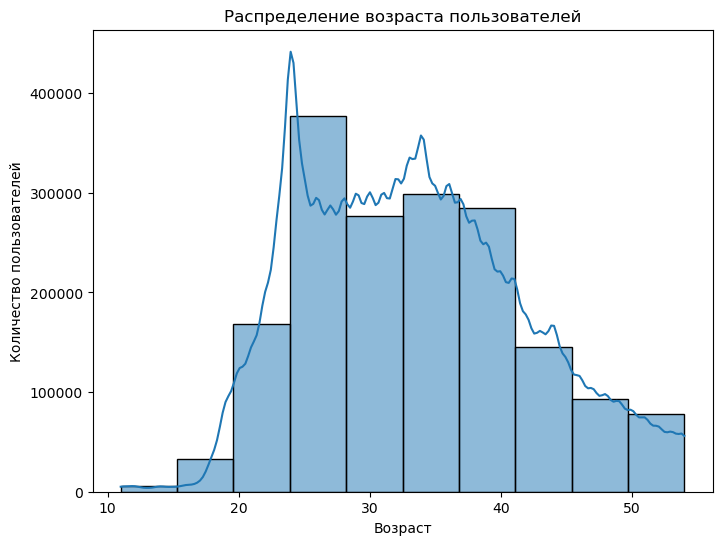

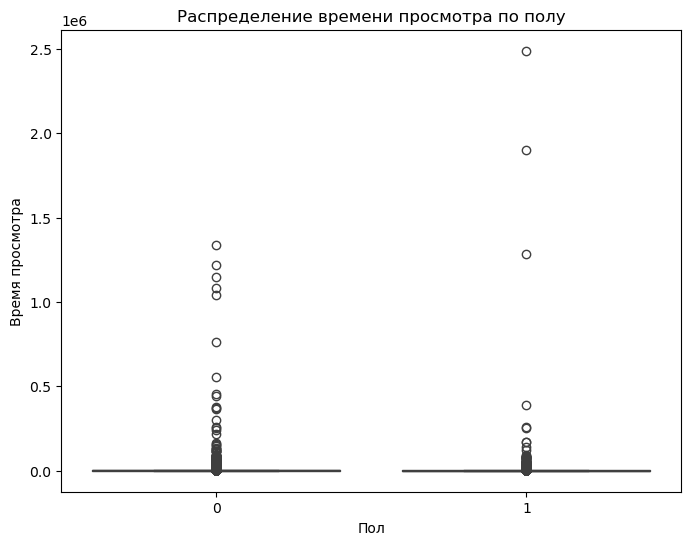

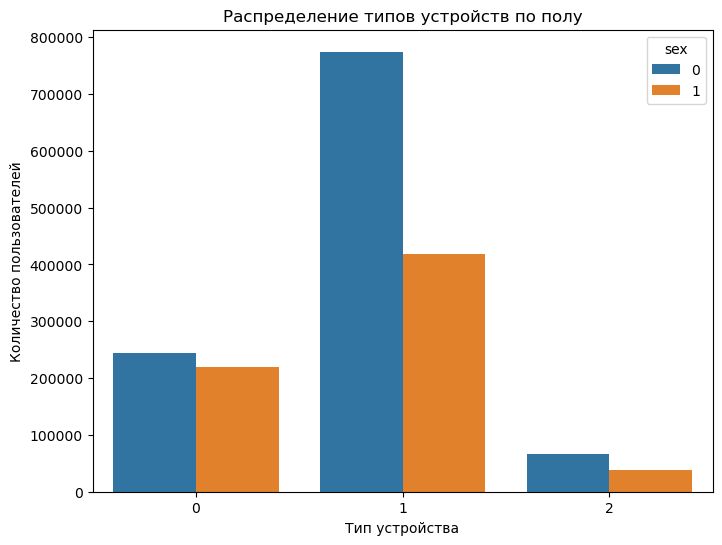

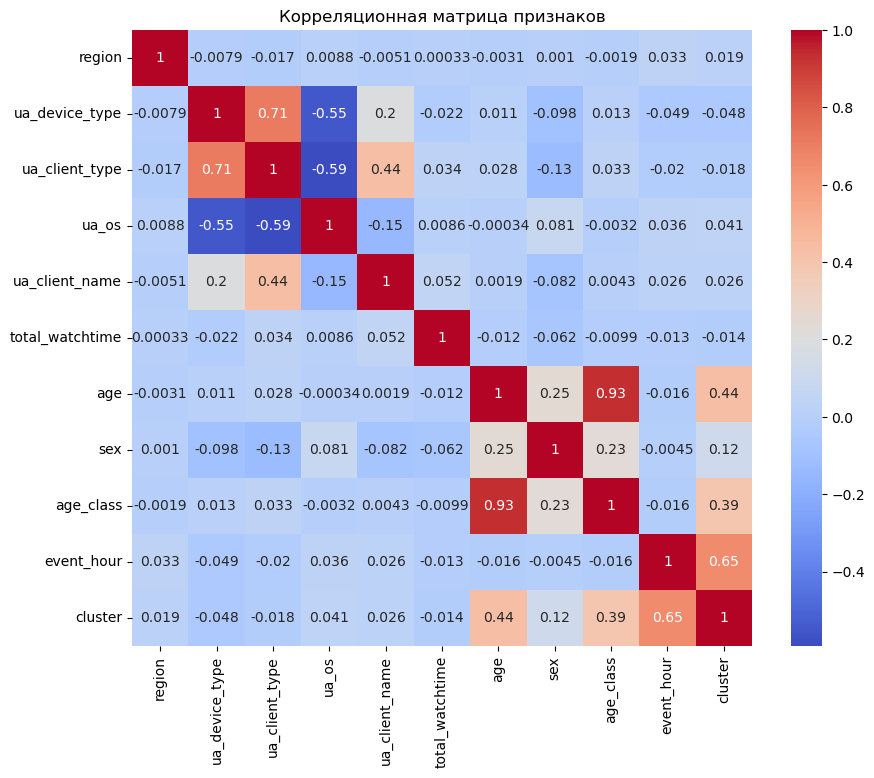

In [7]:
## Описательная статистика
profile_summary = df.describe(include='all')
print(profile_summary)

## Процентное распределение категориальных переменных
print("Распределение пола (sex):")
print(df['sex'].value_counts(normalize=True) * 100)

print("\nРаспределение устройств (ua_device_type):")
print(df['ua_device_type'].value_counts(normalize=True) * 100)

print("\nРаспределение ОС (ua_os):")
print(df['ua_os'].value_counts(normalize=True) * 100)

##

## Кластеризация для выявления групп пользователей
features = df[['age', 'event_hour', 'total_watchtime']]  # Признаки для кластеризации
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Средние значения для каждого кластера
cluster_profile = df.groupby('cluster').mean()
print("\nСредние значения для каждого кластера пользователей:")
print(cluster_profile)

## Сводные таблицы для анализа поведения
pivot_table = df.pivot_table(values='total_watchtime', index='sex', columns='ua_device_type', aggfunc='mean')
print("\nСводная таблица: Среднее время просмотра по полу и типу устройства:")
print(pivot_table)

## Визуализация данных
# Распределение возраста
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.show()

# Время просмотра по полу
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='total_watchtime', data=df)
plt.title("Распределение времени просмотра по полу")
plt.xlabel("Пол")
plt.ylabel("Время просмотра")
plt.show()

# Распределение типов устройств по полу
plt.figure(figsize=(8, 6))
sns.countplot(x='ua_device_type', hue='sex', data=df)
plt.title("Распределение типов устройств по полу")
plt.xlabel("Тип устройства")
plt.ylabel("Количество пользователей")
plt.show()

## Корреляционный анализ
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица признаков")
plt.show()


In [8]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class,event_hour,cluster
0,13,0,1,20,57,1883,20,0,0,6,0
1,8,1,2,0,46,512,40,0,2,19,2
2,86,0,1,20,9,5647,23,1,1,21,1
3,54,1,2,0,46,1521,41,1,3,23,2
4,54,1,2,0,46,71,38,0,2,22,2
...,...,...,...,...,...,...,...,...,...,...,...
1759611,54,1,2,0,46,4230,32,0,2,17,1
1759612,54,1,1,0,22,382,48,1,3,1,0
1759613,86,0,1,20,33,1342,28,1,1,22,1
1759614,86,1,2,0,46,801,43,0,3,11,2


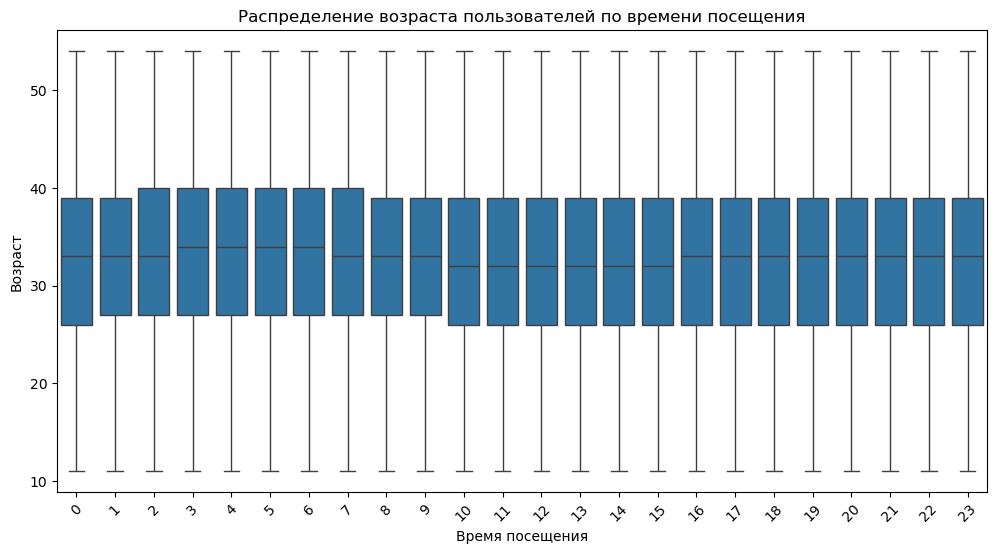

In [12]:
# Построение графика распределения возраста относительно времени посещения
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_hour', y='age', data=df)
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.title('Распределение возраста пользователей по времени посещения')
plt.xlabel('Время посещения')
plt.ylabel('Возраст')
plt.show()


Выводы: В большинстве 

Возраст (age): Возраст пользователя является важной демографической характеристикой, которая может влиять на его предпочтения, поведение и взаимодействие с продуктом или сервисом.
 Общее время просмотра (total_watchtime): Этот признак отражает активность пользователя и его вовлеченность. Он показывает, сколько времени пользователь проводит на платформе.
 -> Молодые активные пользователи: Низкий возраст, высокое время просмотра.
 -> Взрослые пассивные пользователи: Высокий возраст, низкое время просмотра.
 -> Средний возраст с умеренной активностью: Пользователи, находящиеся между двумя крайностями.


На основе проведенного анализа можно сделать следующие выводы о стандартном пользователе :

Возраст (age): Возраст пользователя является важной демографической характеристикой, которая может влиять на его предпочтения, поведение и взаимодействие с продуктом или сервисом. Средний возраст пользователей платформы варьируется в диапазоне от 23 до 40 лет, что является основной возрастной группой, активно использующей сервис для просмотра видеоконтента.

Общее время просмотра (total_watchtime): Этот признак отражает активность пользователя и его вовлеченность. Он показывает, сколько времени пользователь проводит на платформе. На основе анализа данных можно выделить три основные группы пользователей:

Молодые активные пользователи: Низкий возраст и высокое время просмотра, что свидетельствует о высокой вовлеченности этой группы.
Взрослые пассивные пользователи: Высокий возраст и низкое время просмотра. Эти пользователи менее активны и проводят на платформе меньше времени.
Средний возраст с умеренной активностью: Пользователи, которые находятся между двумя крайностями, с умеренным возрастом и средней вовлеченностью.
Зависимость пола от операционной системы и клиента браузера: Корреляционный анализ и статистические тесты показывают, что существует связь между полом пользователей и тем, какую операционную систему или браузер они используют. Это свидетельствует о различиях в предпочтениях женщин и мужчин при выборе устройств и программного обеспечения для просмотра видео.

Корреляционная матрица демонстрирует значительную зависимость между операционной системой, типом устройства и используемым браузером. Эти параметры оказывают влияние друг на друга, что важно учитывать при дальнейшей сегментации пользователей и разработке интерфейсов для различных платформ.

Поведение женщин и мужчин при просмотре видео: Женщины предпочитают выбирать большее количество видеороликов и смотреть их короткими отрезками, что указывает на более "динамичное" поведение в потреблении контента. Мужчины, напротив, могут более тщательно подходить к выбору видеороликов, уделяя больше времени на просмотр каждого конкретного видео. Это различие может свидетельствовать о разнице в предпочтениях и подходах к выбору контента между полами.